# COVID-19 Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('./Datasets/country_wise_latest.csv')
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
data.rename(columns={
    'Country/Region': 'country',
    'Confirmed':'confirmed_cases',
    'Deaths':'deaths', 
    'Recovered':'recovered', 
    'New cases': 'new_cases',
    'New deaths': 'new_deaths',
    'New recovered': 'new_recovered',
    'Deaths / 100 Cases': 'deaths_per_100_cases',
    'Recovered / 100 Cases': 'recovered_per_100_cases',
    'Deaths / 100 Recovered': 'deaths_per_100_recovered',
    'Confirmed last week': 'confirmed_last_week',
    '1 week change': 'one_week_change',
    '1 week % increase': 'one_week_perc_change',
    'WHO Region': 'who_region'
}, inplace=True)


## Handling Missing Values

In [4]:
missing_data = data.isna().sum()
print(missing_data)

country                     0
confirmed_cases             0
deaths                      0
recovered                   0
Active                      0
new_cases                   0
new_deaths                  0
new_recovered               0
deaths_per_100_cases        0
recovered_per_100_cases     0
deaths_per_100_recovered    0
confirmed_last_week         0
one_week_change             0
one_week_perc_change        0
who_region                  0
dtype: int64


## Top 10 countries with the highest cases & deaths

In [56]:
countries_with_highest_cases = data.sort_values(by="confirmed_cases", ascending=False)[['country', 'confirmed_cases']].head(10).reset_index(drop=True)
countries_with_highest_deaths = data.sort_values(by="deaths", ascending=False)[['country', 'deaths']].head(10).reset_index(drop=True)
print("TOp 10- Countries with Highest Number Of Cases: \n\n",countries_with_highest_cases)
print("\n\nTOp 10- Countries with Highest Number Of Deaths:\n\n ",countries_with_highest_deaths)

TOp 10- Countries with Highest Number Of Cases: 

           country  confirmed_cases
0              US          4290259
1          Brazil          2442375
2           India          1480073
3          Russia           816680
4    South Africa           452529
5          Mexico           395489
6            Peru           389717
7           Chile           347923
8  United Kingdom           301708
9            Iran           293606


TOp 10- Countries with Highest Number Of Deaths:

            country  deaths
0              US  148011
1          Brazil   87618
2  United Kingdom   45844
3          Mexico   44022
4           Italy   35112
5           India   33408
6          France   30212
7           Spain   28432
8            Peru   18418
9            Iran   15912


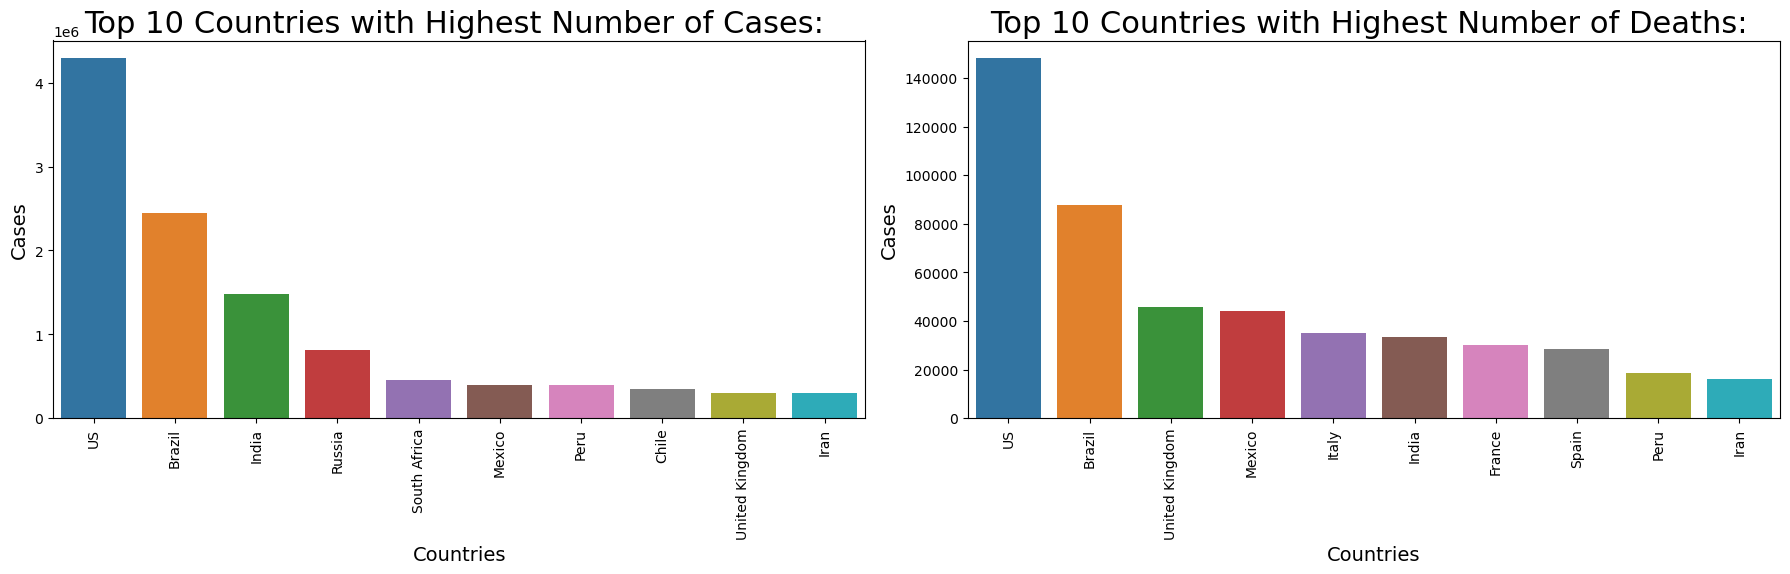

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 1-row, 2-column subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# First bar plot for confirmed cases
sns.barplot(x='country', y='confirmed_cases', data=countries_with_highest_cases, ax=axes[0], hue='country')
axes[0].set_title("Top 10 Countries with Highest Number of Cases: ", fontsize=22)
axes[0].set_ylabel('Cases', fontsize=14)
axes[0].set_xlabel('Countries', fontsize=14)
axes[0].tick_params(axis='x', rotation=90) 

# Second bar plot for deaths
sns.barplot(x='country', y='deaths', data=countries_with_highest_deaths, ax=axes[1], hue='country')
axes[1].set_title("Top 10 Countries with Highest Number of Deaths: ", fontsize=22)
axes[1].set_ylabel('Cases', fontsize=14)
axes[1].set_xlabel('Countries', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



## Plot total cases & total deaths over time, Identify peaks in cases.

In [7]:
day_data = pd.read_csv('./Datasets/day_wise.csv')
day_data.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [18]:
# Handling Data
day_data.rename(columns={
    'Date': 'date',
    'Confirmed':'confirmed_cases',
    'Deaths':'deaths', 
    'Recovered':'recovered', 
    'New cases': 'new_cases',
    'New deaths': 'new_deaths',
    'New recovered': 'new_recovered',
    'Deaths / 100 Cases': 'deaths_per_100_cases',
    'Recovered / 100 Cases': 'recovered_per_100_cases',
    'No. of countries': 'no_of_countries',
    'Confirmed last week': 'confirmed_last_week'
}, inplace=True)
day_data['date'] = pd.to_datetime(day_data['date'])

In [19]:
# Missing items
missing_data = day_data.isna().sum()
display(missing_data)

date                       0
confirmed_cases            0
deaths                     0
recovered                  0
Active                     0
new_cases                  0
new_deaths                 0
new_recovered              0
deaths_per_100_cases       0
recovered_per_100_cases    0
deaths_per_100_cases       0
no_of_countries            0
week_number                0
dtype: int64

#### Total cases and deaths over time

In [57]:
day_data['week_number']=(((day_data['date']-day_data['date'].min()).dt.days//7) + 1).astype(str)

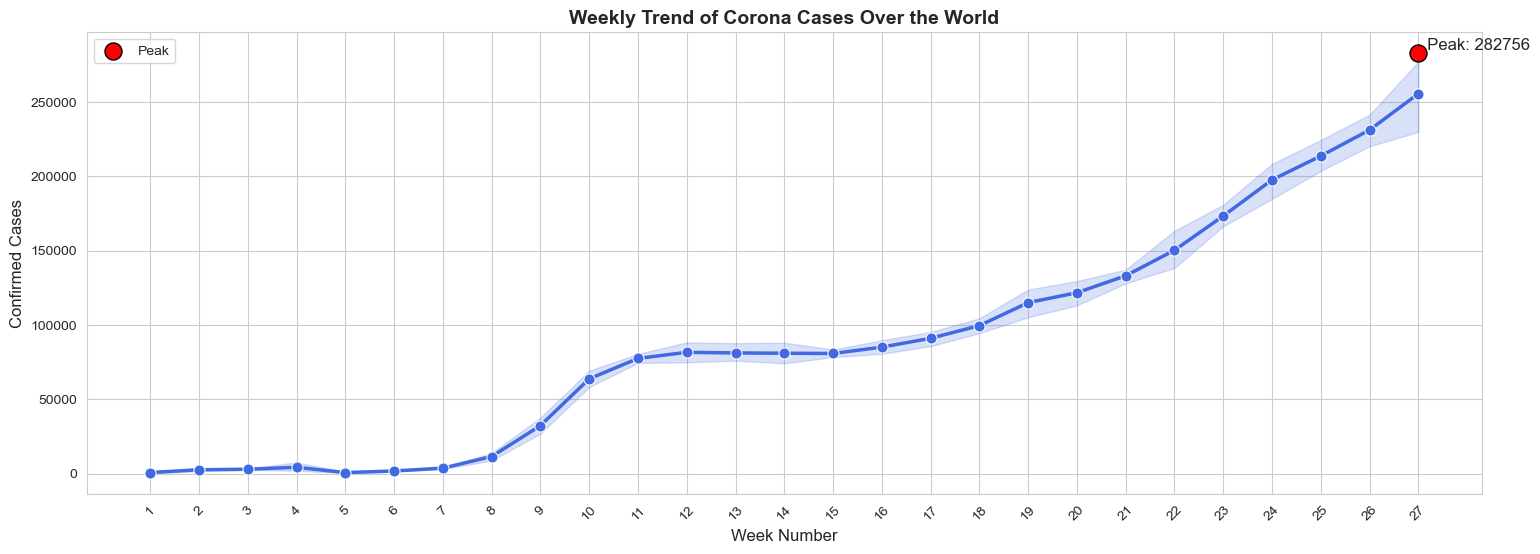

In [16]:
sns.set_style("whitegrid")  

plt.figure(figsize=(18, 6))
ax = sns.lineplot(x='week_number', y='new_cases', data=day_data, 
                  marker='o', markersize=8, linewidth=2.5, color='royalblue')

peak_row = day_data.loc[day_data['new_cases'].idxmax()]
peak_x = peak_row['week_number']
peak_y = peak_row['new_cases']

# Highlight the peak
plt.scatter(peak_x, peak_y, color='red', s=150, edgecolors='black', label="Peak")
plt.text(peak_x, peak_y, f"  Peak: {peak_y}", fontsize=12, verticalalignment='bottom')

# Beautify the chart
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Week Number", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.title("Weekly Trend of Corona Cases Over the World", fontsize=14, fontweight="bold")

# Add legend
plt.legend()

# Show the plot
plt.show()

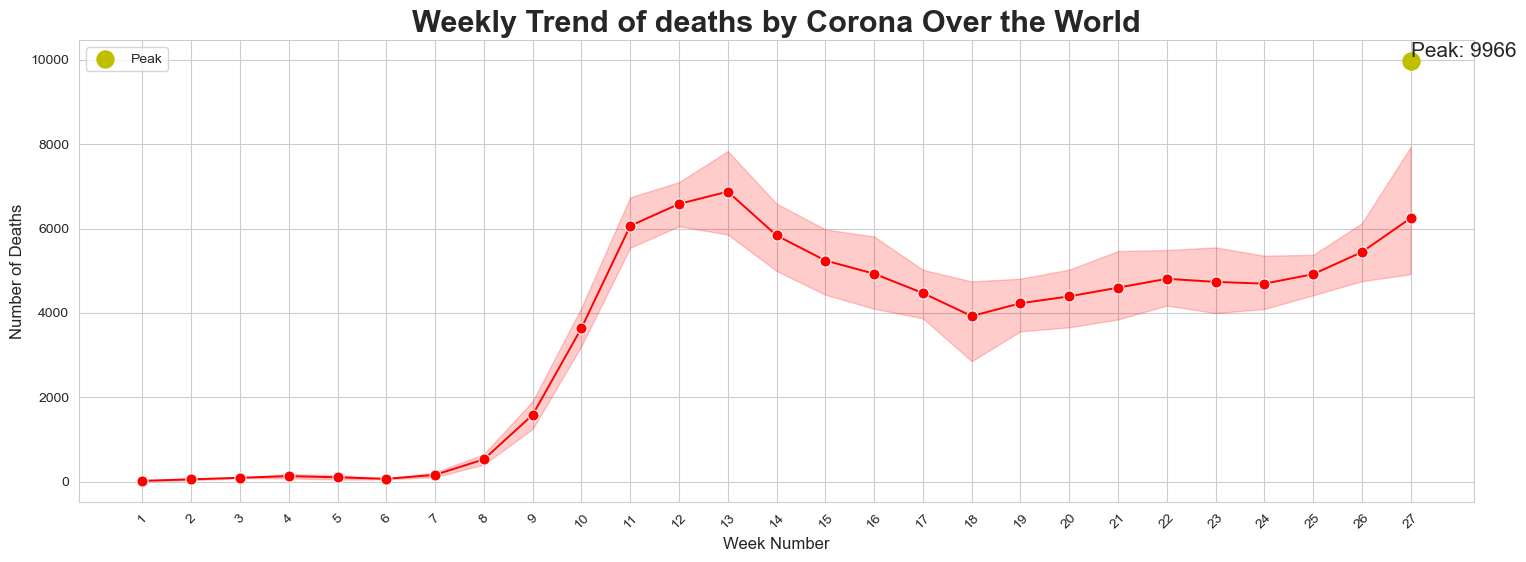

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,6))
sns.lineplot(x='week_number', y='new_deaths', data=day_data, marker='o', markersize=8, linewidth=1.4, color='r')
peak_row = day_data.loc[day_data['new_deaths'].idxmax()]
peak_x = peak_row['week_number']
peak_y = peak_row['new_deaths']
plt.scatter(peak_x,peak_y, s=150, color='y',label='Peak',)
plt.text(peak_x, peak_y, f"Peak: {peak_row['new_deaths']}", fontsize=15,verticalalignment='bottom')

# Beautify the chart
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Week Number", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.title("Weekly Trend of deaths by Corona Over the World", fontsize=22, fontweight="bold")

# Add legend
plt.legend()

# Show the plot
plt.show()

## Recovery Rate of covid 19 over the week:

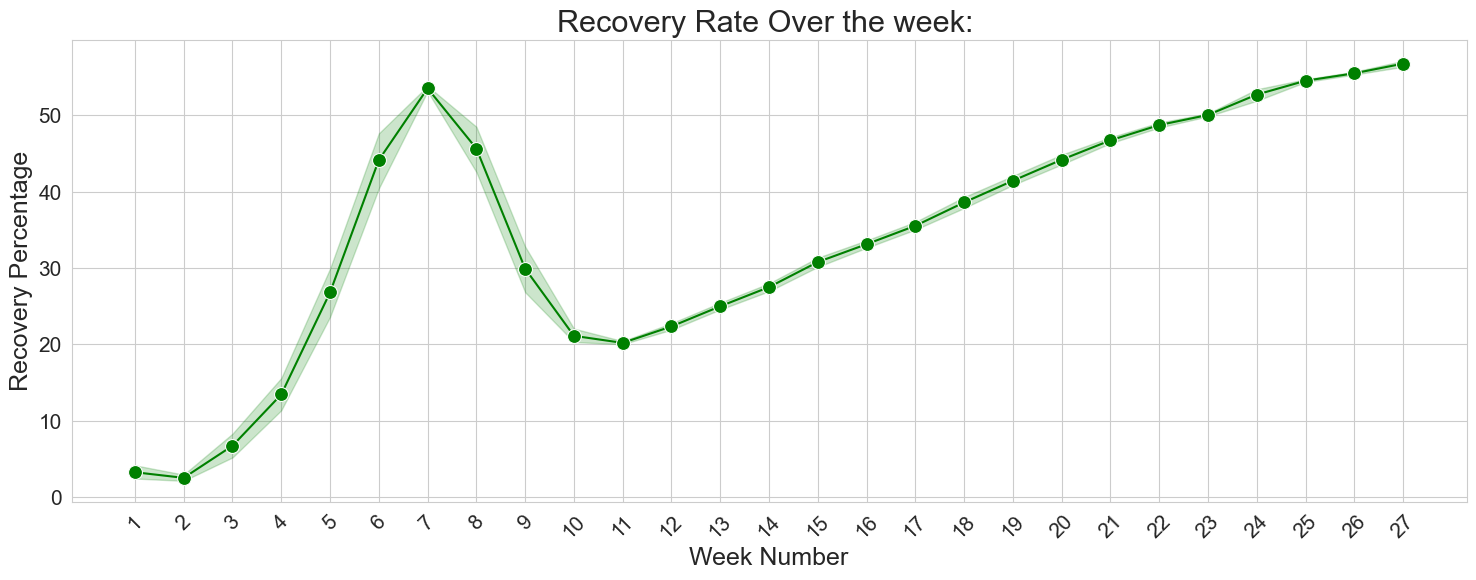

In [54]:
day_data['recovery_perc'] = day_data['recovered']/day_data['confirmed_cases']*100
day_data['recovery_perc'].fillna(0)
sns.set_style('whitegrid')
plt.figure(figsize=(18,6))
sns.lineplot(x='week_number', y='recovery_perc', data=day_data, marker='o', markersize=10,color='g')

plt.xlabel("Week Number", fontsize=18)
plt.ylabel("Recovery Percentage", fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.yticks( fontsize=15)
plt.title("Recovery Rate Over the week: ", fontsize=22)
# plt.legend()
plt.show()